In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("credit card_dataset.csv")

In [ ]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [ ]:
df.tail()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [ ]:
#shape
df.shape

(690, 16)

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [ ]:
#finding missing values
df.isnull().sum()

,0
Gender,0
Age,0
Debt,0
Married,0
BankCustomer,0
Industry,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


In [ ]:
#finding dulicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#identifying garbage values
for i in df.select_dtypes(include="object").columns:
  print(i)
  print(df[i].value_counts())
  print("***"*10)

Industry
Industry
Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
Utilities                 38
CommunicationServices     38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: count, dtype: int64
******************************
Ethnicity
Ethnicity
White     408
Black     138
Asian      59
Latino     57
Other      28
Name: count, dtype: int64
******************************
Citizen
Citizen
ByBirth         625
ByOtherMeans     57
Temporary         8
Name: count, dtype: int64
******************************


In [ ]:
#STEP 4:EXPLORATORY DATA ANALYSIS
#descriptive statistics
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [ ]:
numeric_cols = [
    col for col in df.select_dtypes(include=['number']).columns
    if set(df[col].unique()) != {0, 1}
]


In [ ]:
numeric_cols

['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']

In [ ]:
df.describe(include="object")

,Industry,Ethnicity,Citizen
count,690,690,690
unique,14,5,3
top,Energy,White,ByBirth
freq,146,408,625


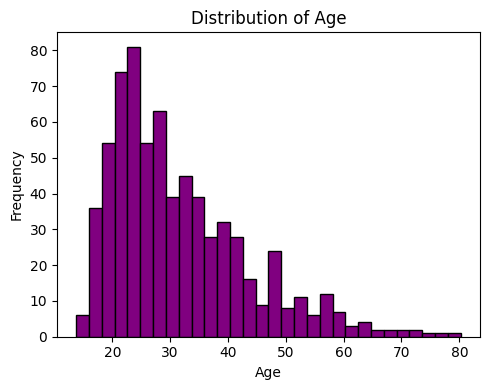

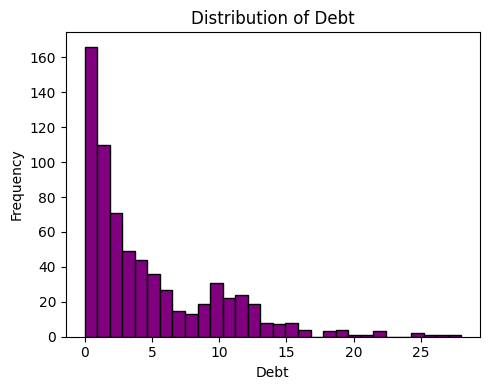

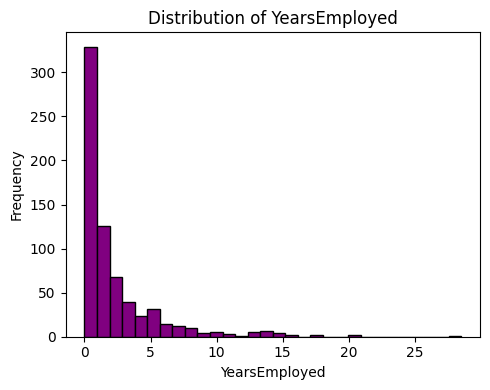

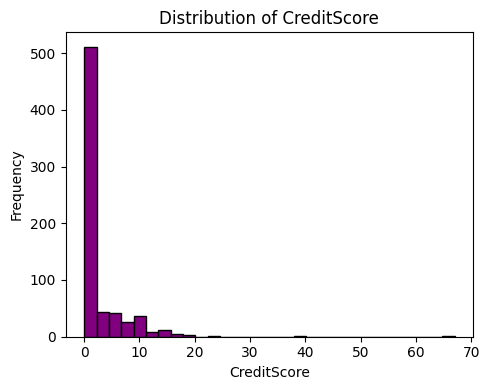

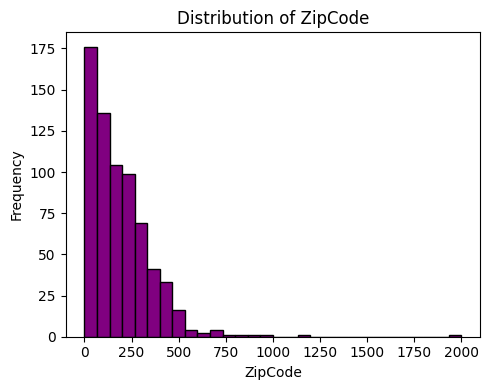

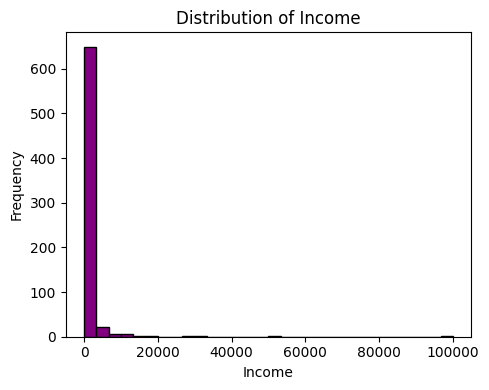

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    plt.hist(df[col], bins=30, color='purple', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


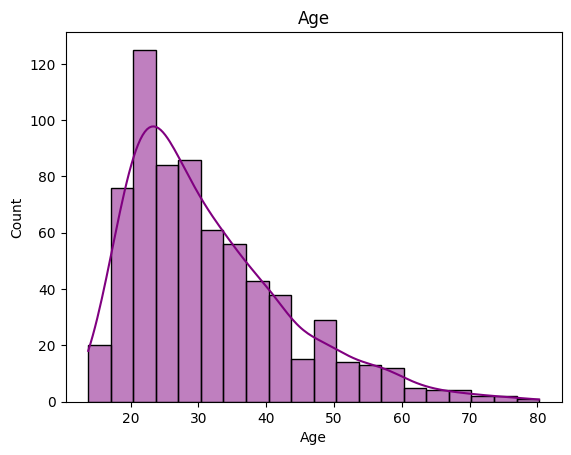

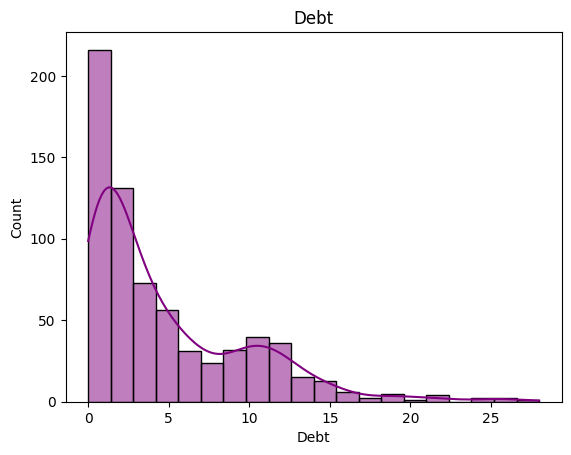

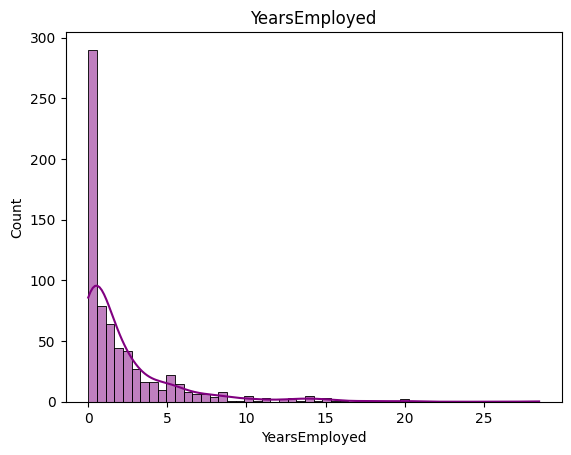

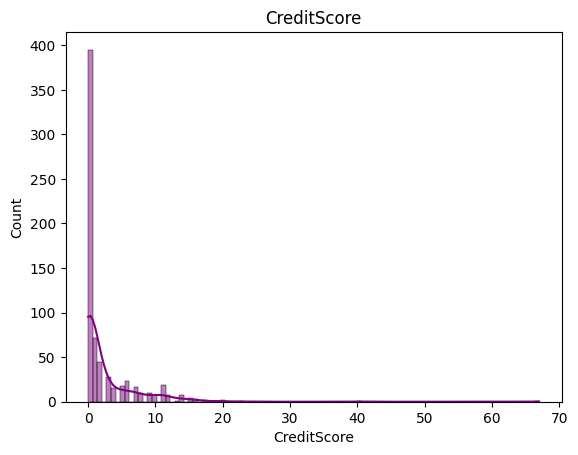

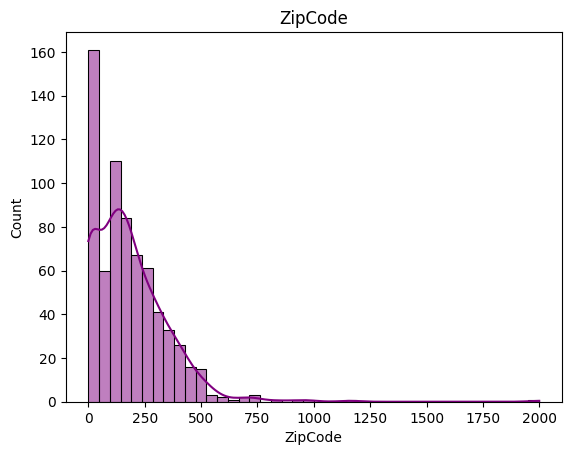

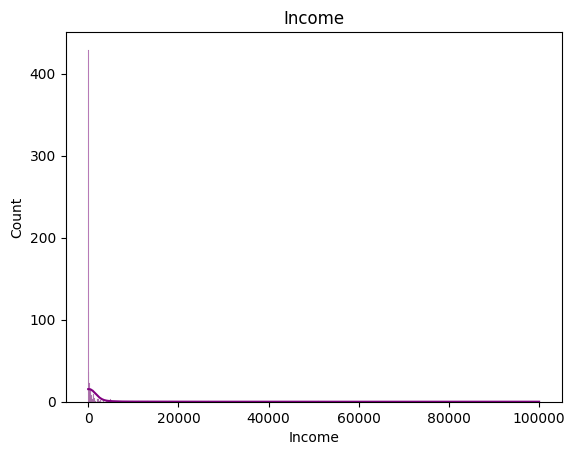

In [ ]:

for i in numeric_cols:
  sns.histplot(df[i],kde=True,color='purple')
  plt.title(i)
  plt.show()
  plt.show()

In [ ]:
#MISSING VALUE TREATMENTS
df.isnull().sum()

,0
Gender,0
Age,0
Debt,0
Married,0
BankCustomer,0
Industry,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


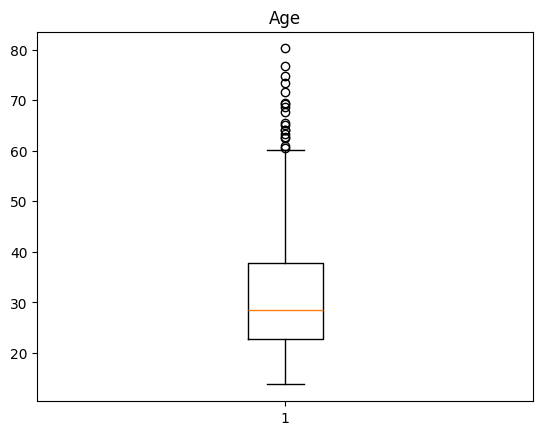

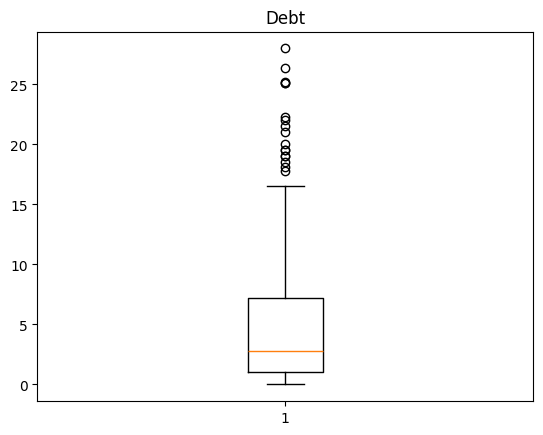

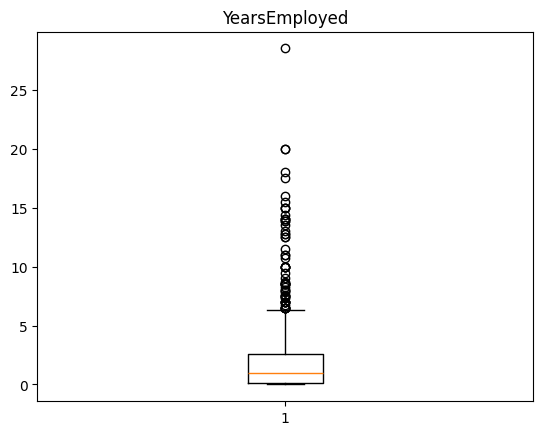

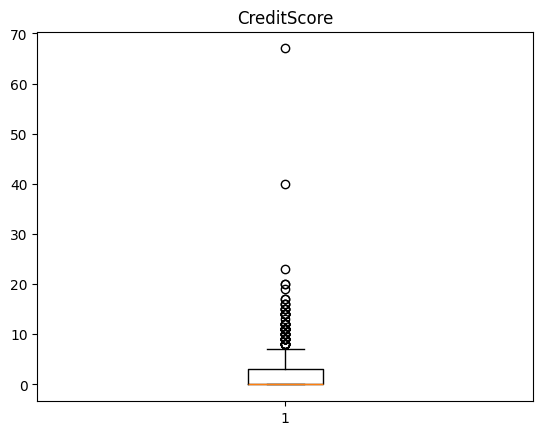

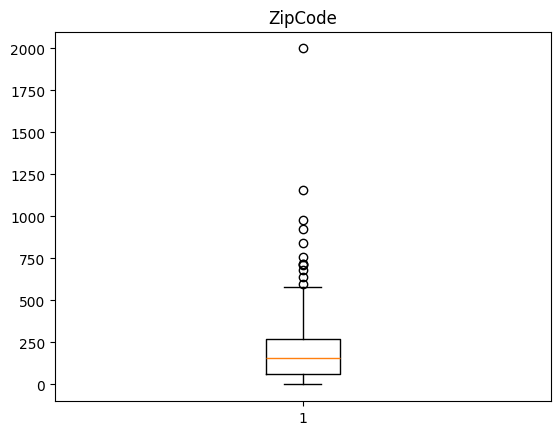

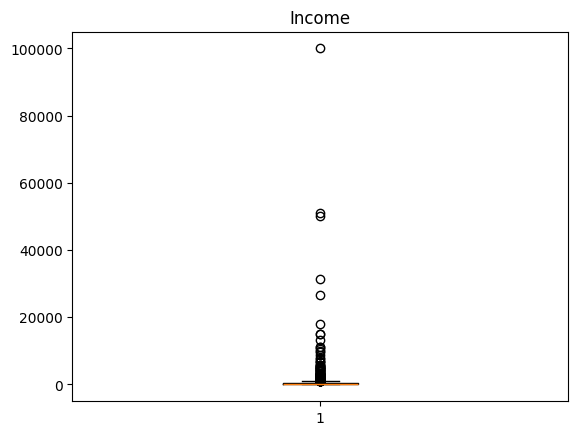

In [ ]:
#OUTLIERS TREATMENTS
import warnings
warnings.filterwarnings("ignore")
for i in numeric_cols:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

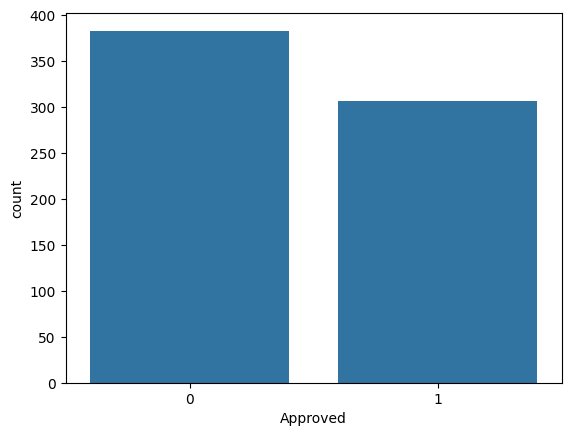

In [ ]:
sns.countplot(data=df,x='Approved')
plt.show()

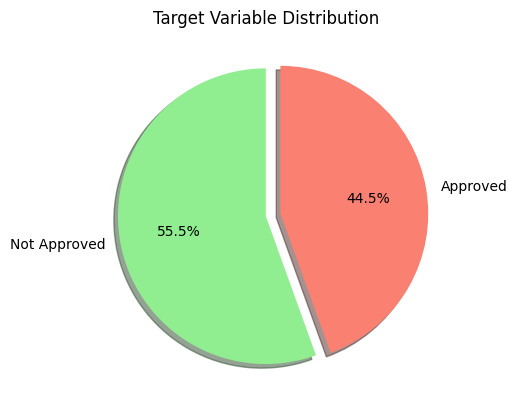

In [ ]:
# Pie chart of target variable
df['Approved'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Approved', 'Approved'],
                                   colors=['lightgreen', 'salmon'], startangle=90,
                                   shadow=True, explode=[0, 0.1])
plt.title('Target Variable Distribution')
plt.ylabel('')
plt.show()


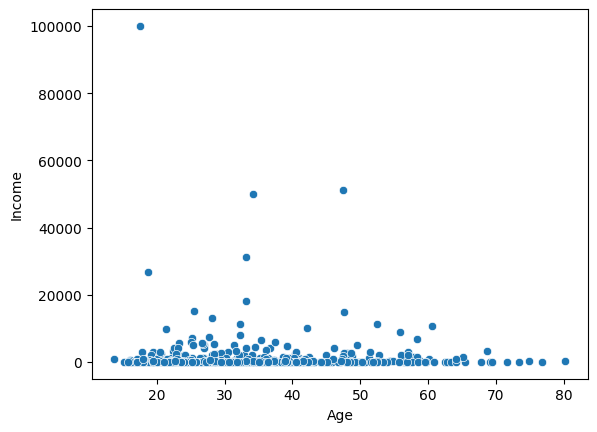

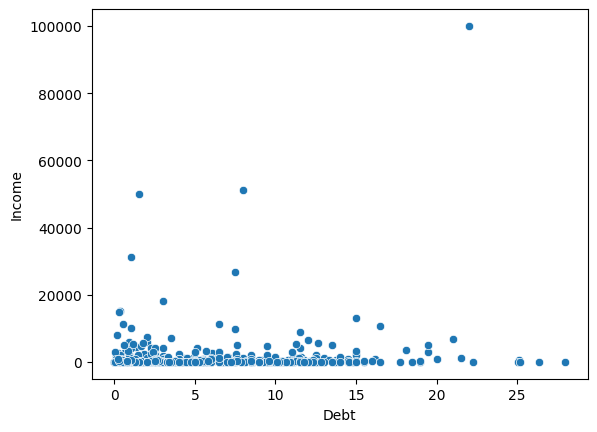

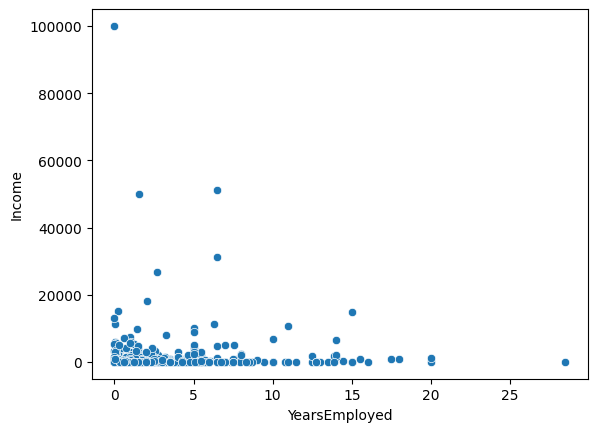

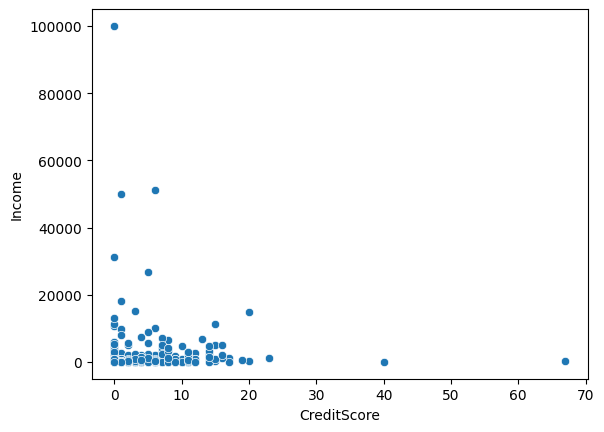

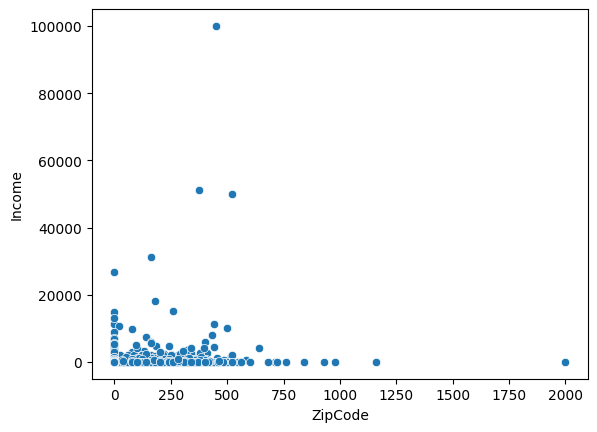

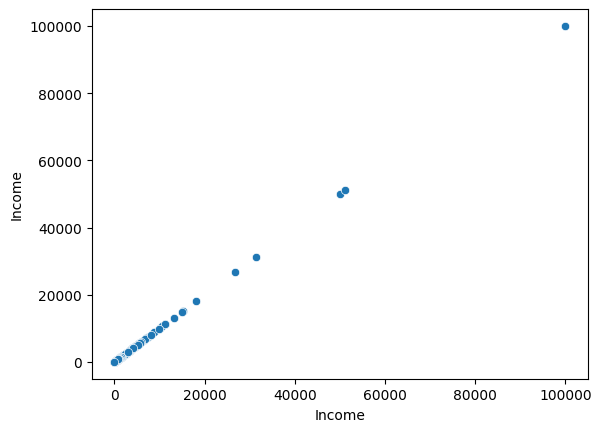

In [ ]:
for i in numeric_cols:
    sns.scatterplot(x=i,y="Income",data=df)
    plt.show()

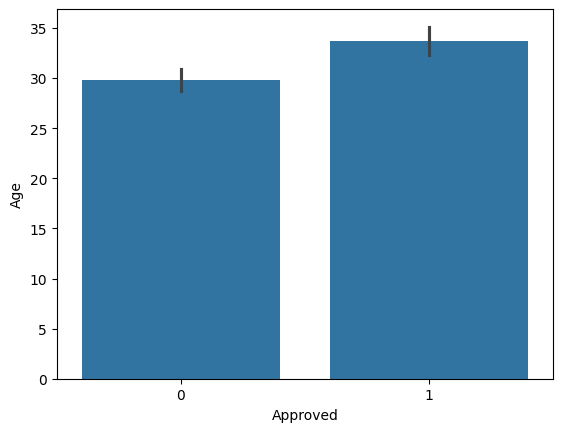

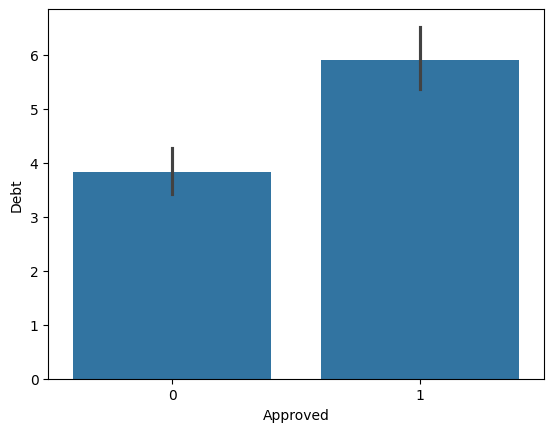

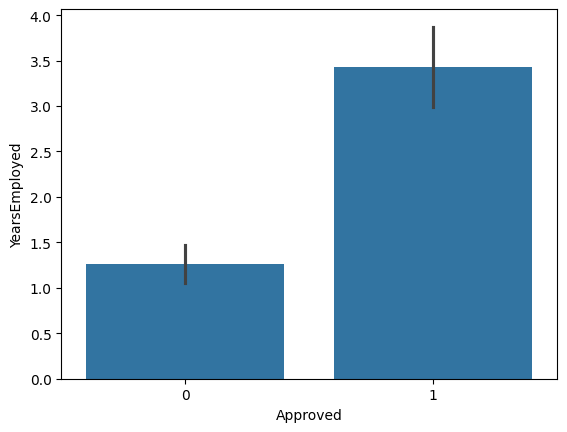

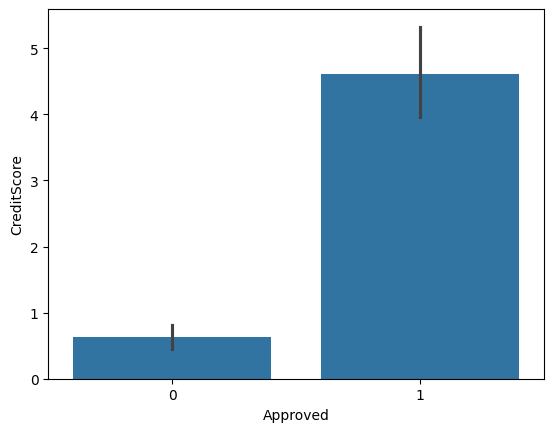

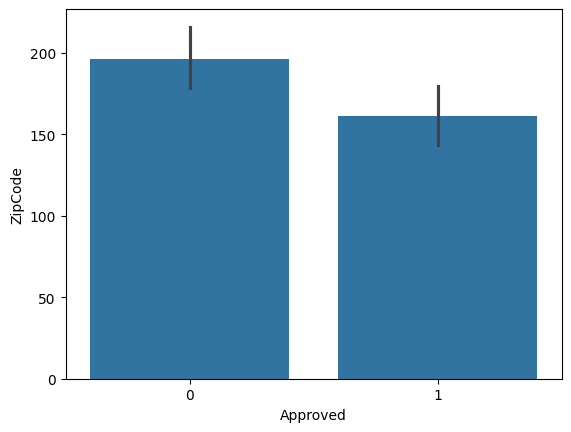

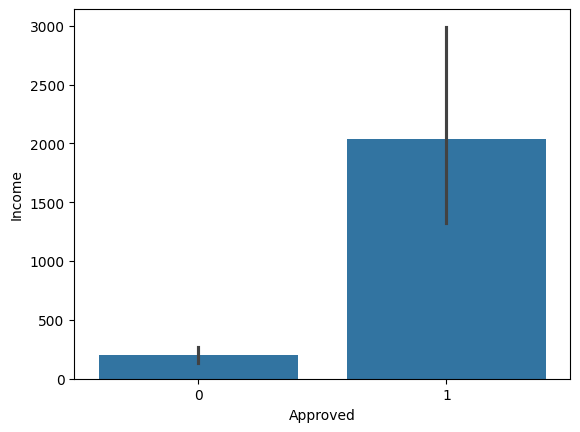

In [ ]:
for i in numeric_cols:
    sns.barplot(data=df,x='Approved',y=i)
    plt.show()

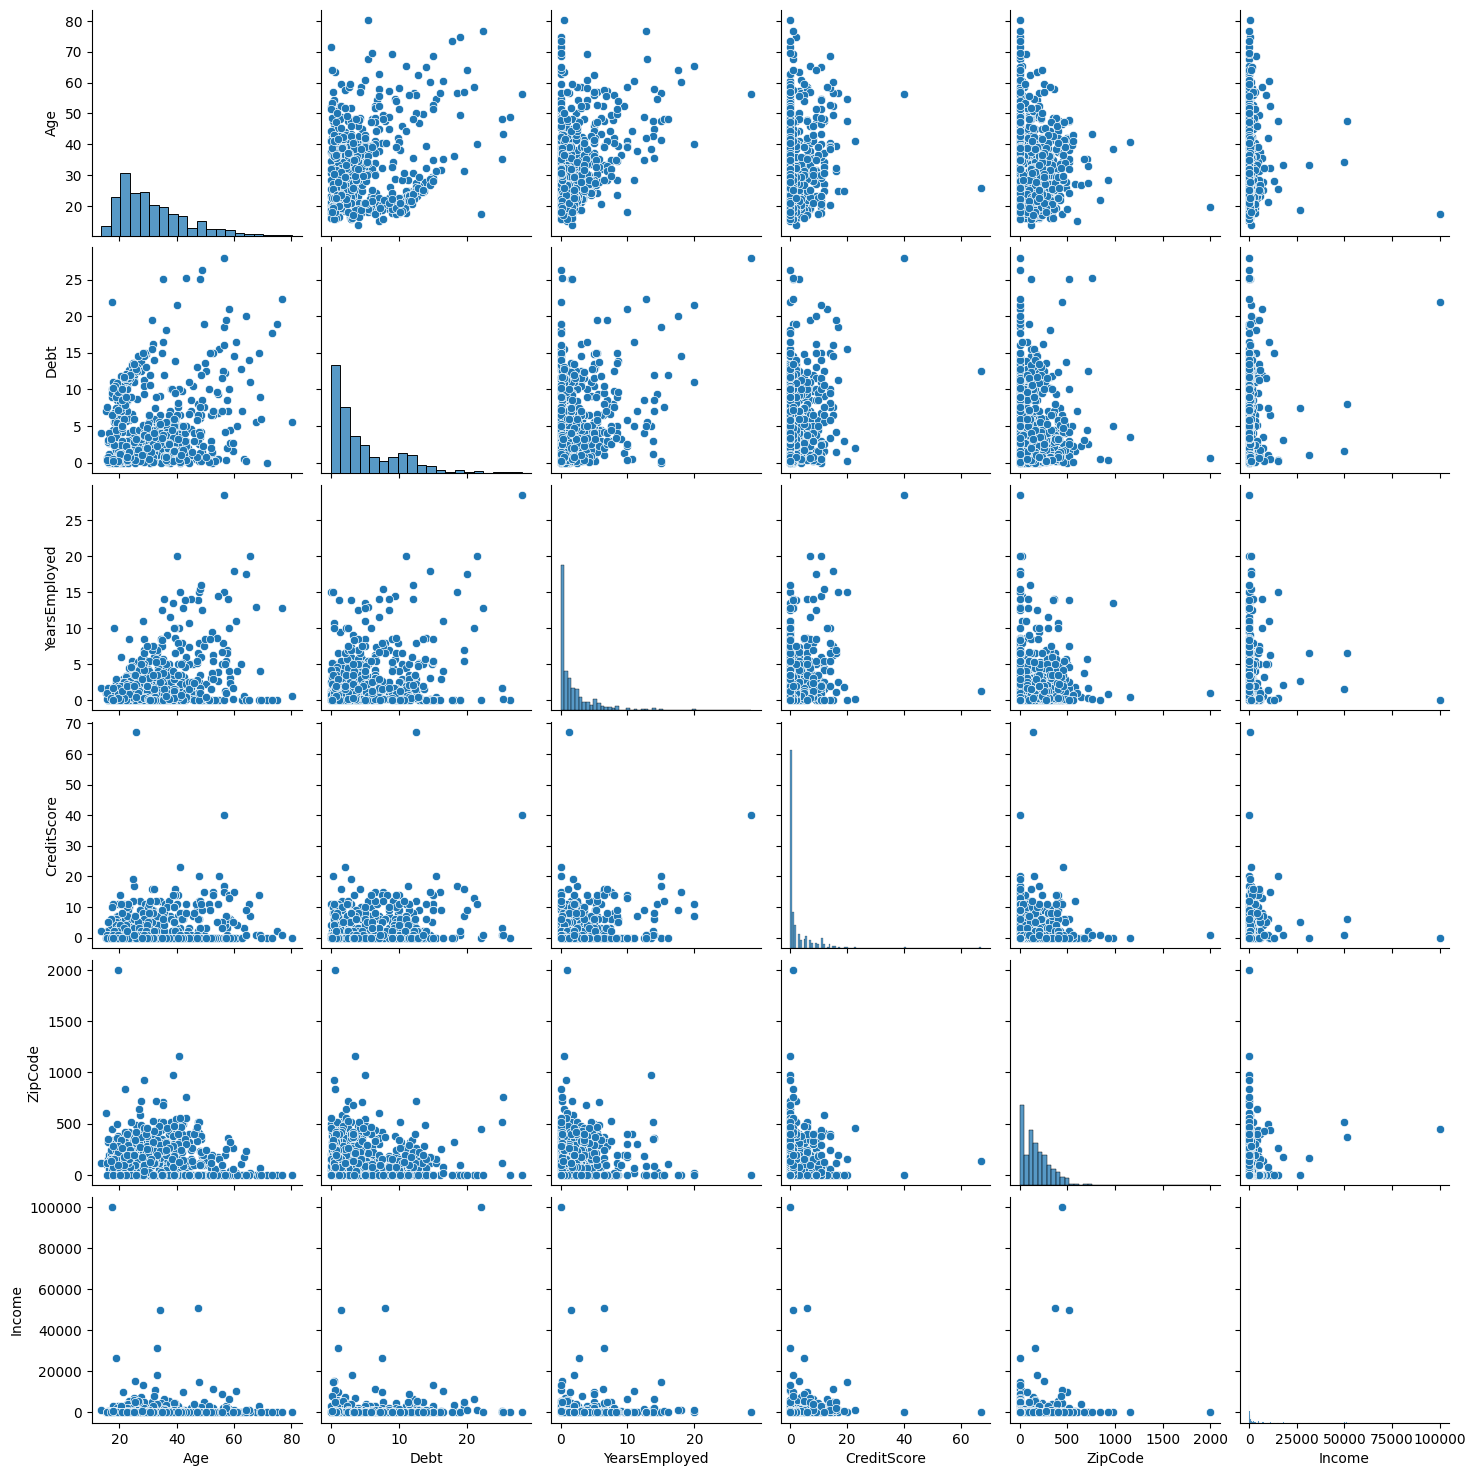

In [ ]:
sns.pairplot(df[numeric_cols])
plt.show()

In [ ]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

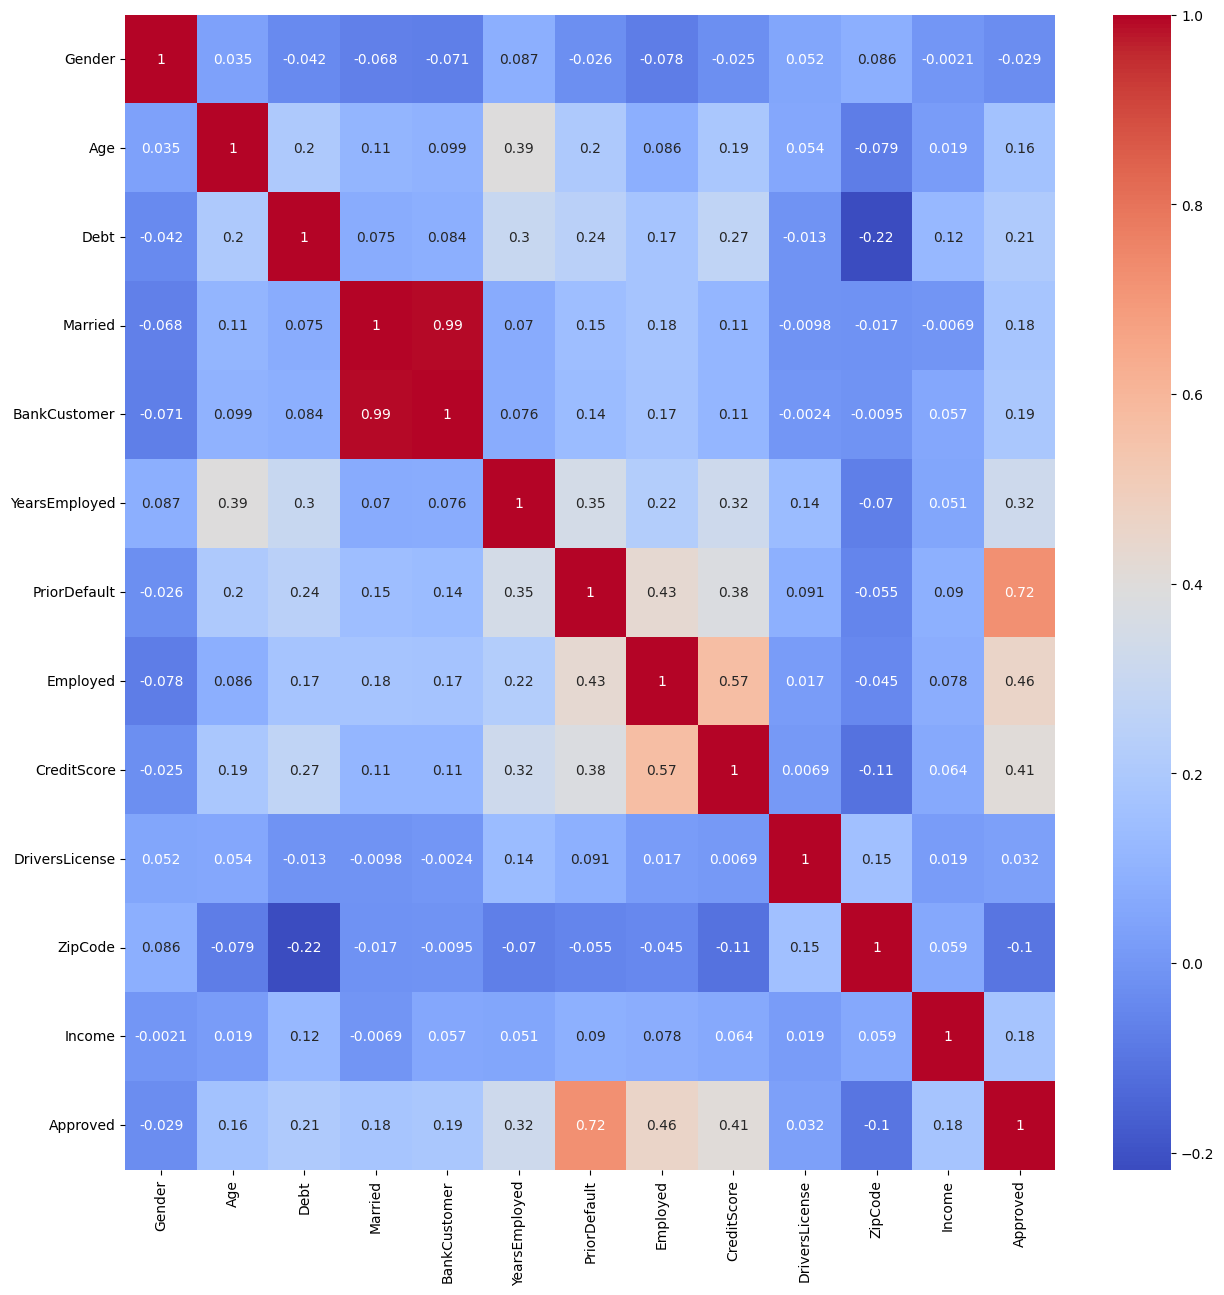

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
def iqr_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((column < lower) | (column > upper)).sum()

# Apply to all numeric columns
for col in numeric_cols:
    outlier_count = iqr_outliers(df[col])
    print(f"{col}: {outlier_count} outliers")


Age: 18 outliers
Debt: 17 outliers
YearsEmployed: 63 outliers
CreditScore: 79 outliers
ZipCode: 12 outliers
Income: 113 outliers


In [ ]:
df['Debt_log'] = np.log1p(df['Debt'])
df['YearsEmployed_log'] = np.log1p(df['YearsEmployed'])
df['Income_log'] = np.log1p(df['Income'])
df['CreditScore_log'] = np.log1p(df['CreditScore'])


In [ ]:
new_cols=['Debt_log','YearsEmployed_log','Income_log','CreditScore_log']

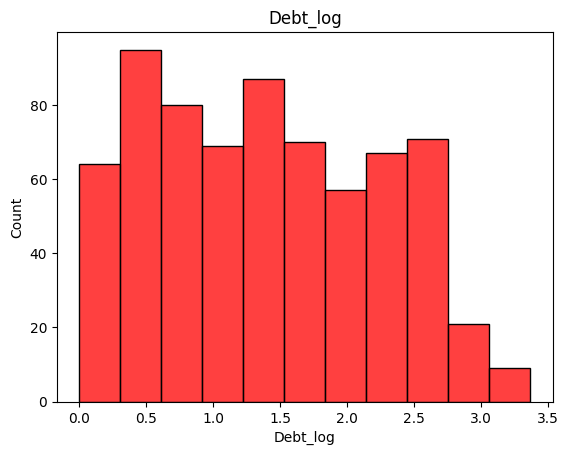

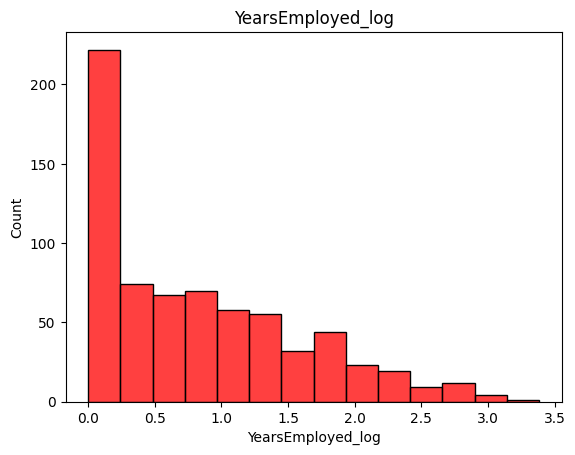

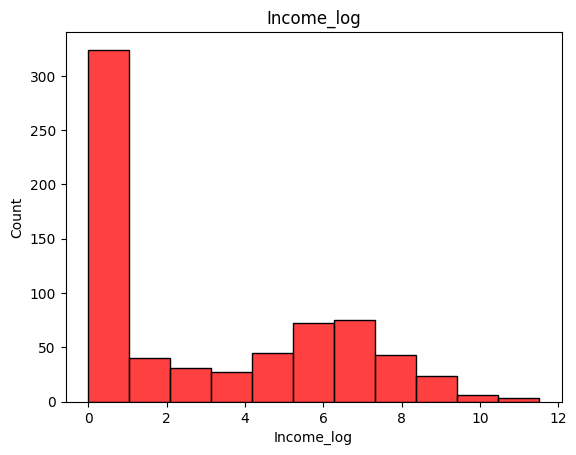

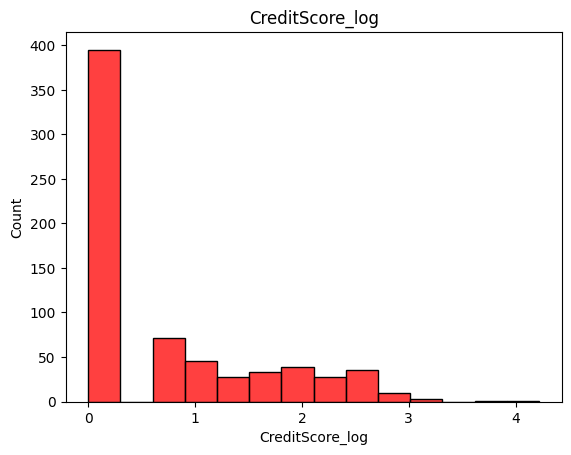

In [ ]:
for i in new_cols:
    sns.histplot(df[i],color='red')
    plt.title(i)
    plt.show()

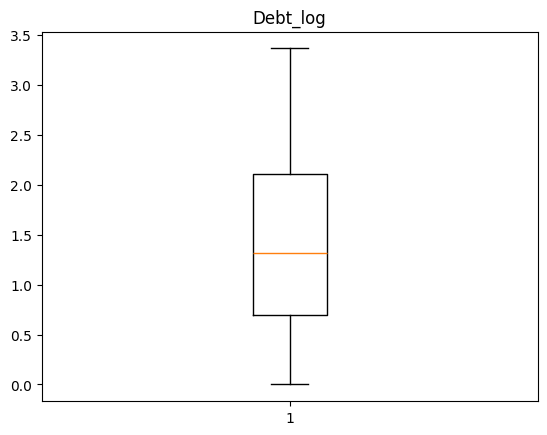

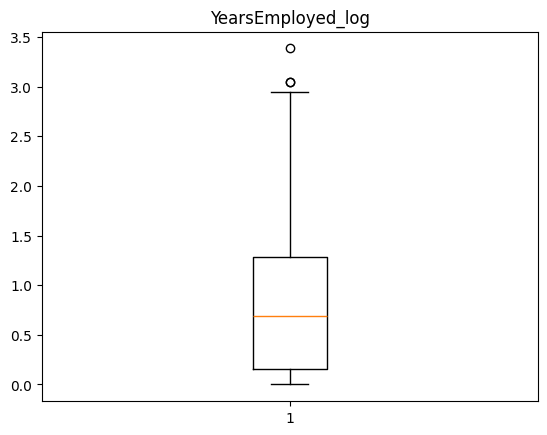

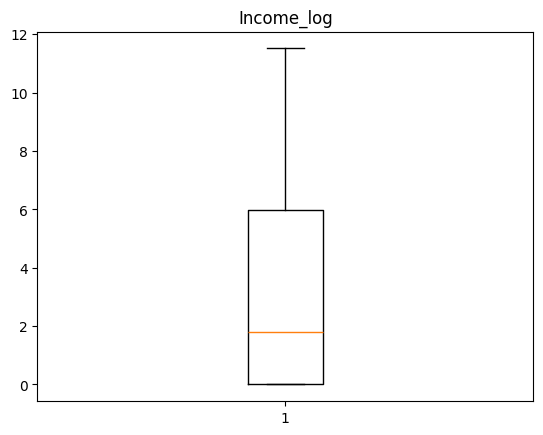

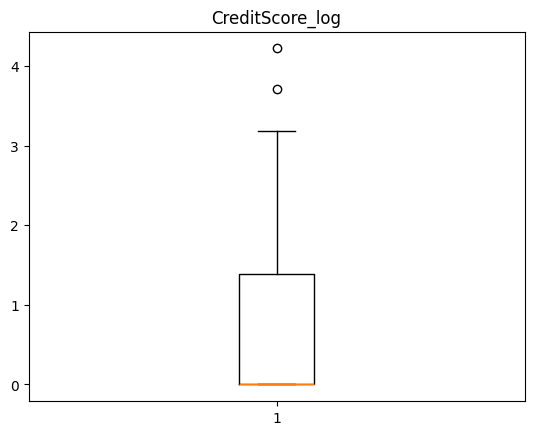

In [ ]:
for i in new_cols:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
df_new=df

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ["Industry", "Ethnicity", "Citizen"]:
    df_new[col] = le.fit_transform(df[col])


In [ ]:
from sklearn.preprocessing import RobustScaler
X=df_new.drop(columns=['Approved'])
Y=df_new['Approved']

scaler = RobustScaler()
for i in new_cols:
    X[i] = scaler.fit_transform(X[[i]])


In [ ]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.2 MB/s eta 0:00:00


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df = pd.DataFrame({'vif': vif}, index=X.columns)
vif_df


,vif
Gender,3.189440
Age,7.784200
Debt,13.890444
Married,388.045873
BankCustomer,392.183680
Industry,3.444543
Ethnicity,4.093957
YearsEmployed,9.441334
PriorDefault,3.235229
Employed,10.397791


In [ ]:
X=df_new.drop(columns=['Debt','YearsEmployed','Income','CreditScore','Married'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df = pd.DataFrame({'vif': vif}, index=X.columns)
vif_df


,vif
Gender,3.133177
Age,7.045510
BankCustomer,4.247160
Industry,3.443019
Ethnicity,3.861736
PriorDefault,4.873737
Employed,6.894442
DriversLicense,1.963188
Citizen,1.265067
ZipCode,2.164444


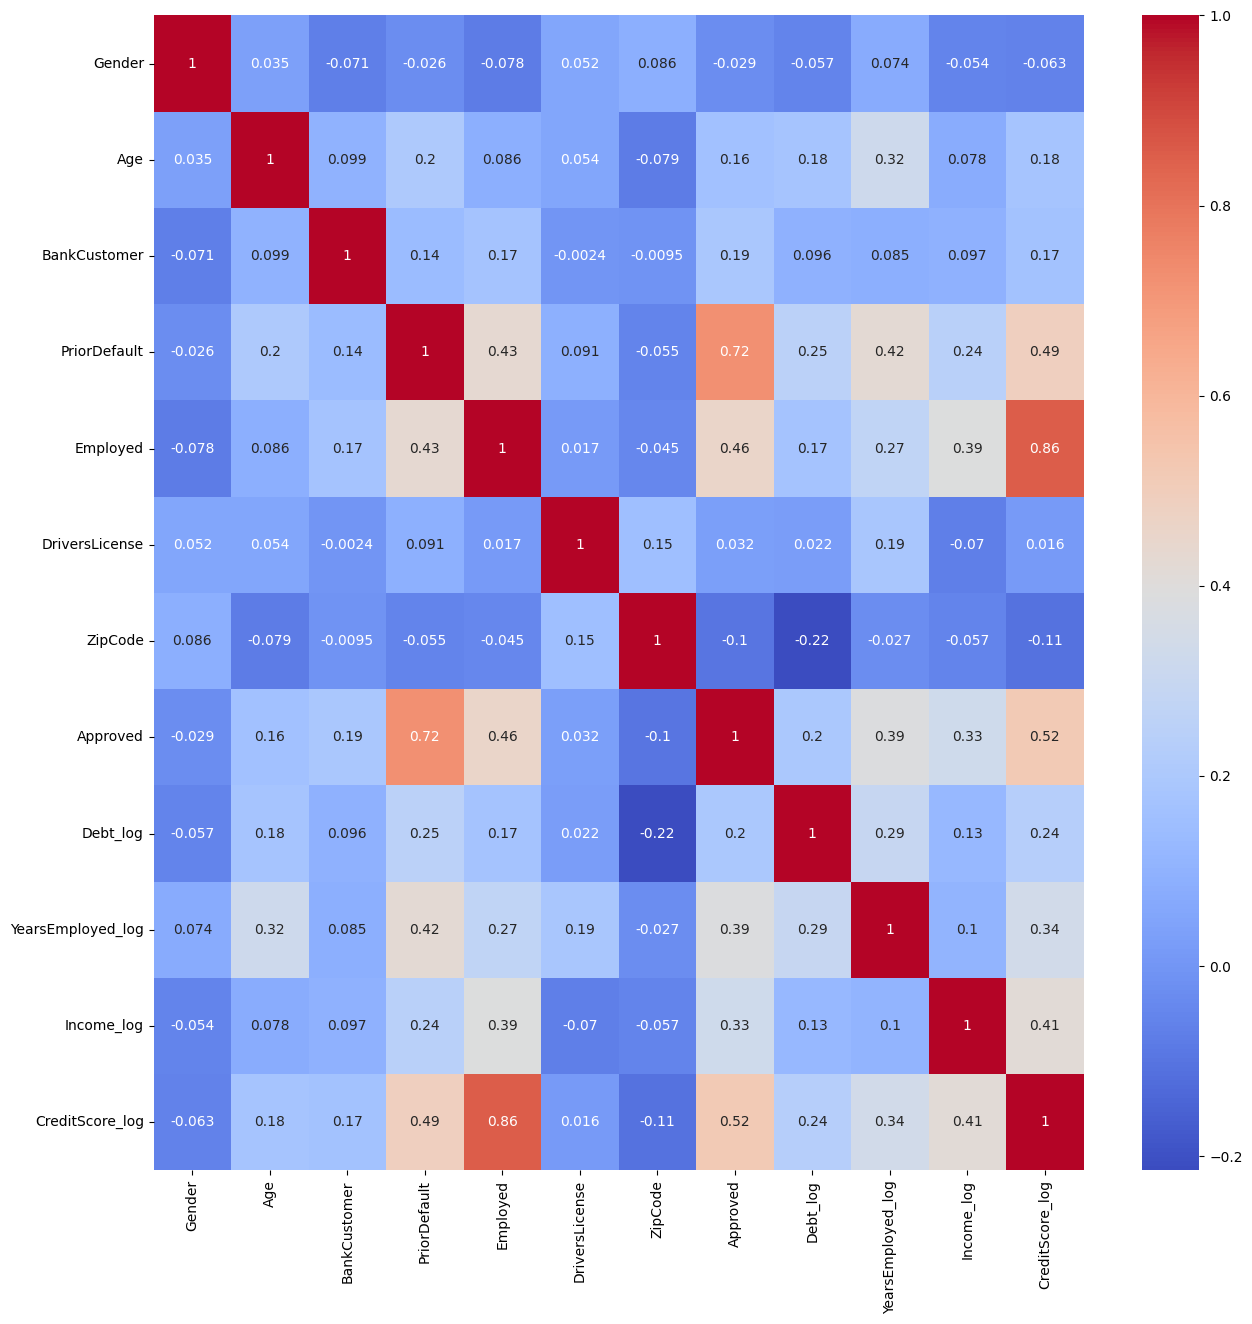

In [ ]:
c=df_new.select_dtypes(include="number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(c,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
X.head()

,Gender,Age,BankCustomer,Industry,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved,Debt_log,YearsEmployed_log,Income_log,CreditScore_log
0,1,30.83,1,7,4,1,1,0,0,202,1,0.000000,0.810930,0.000000,0.693147
1,0,58.67,1,9,1,1,1,0,0,43,1,1.697449,1.396245,6.329721,1.945910
2,0,24.50,1,9,1,1,0,0,0,280,1,0.405465,0.916291,6.715383,0.000000
3,1,27.83,1,7,4,1,1,1,0,100,1,0.932164,1.558145,1.386294,1.791759
4,1,20.17,1,7,4,1,0,0,1,120,1,1.890850,0.996949,0.000000,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

0.855072463768116
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        68
           1       0.87      0.84      0.86        70

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138

[[59  9]
 [11 59]]


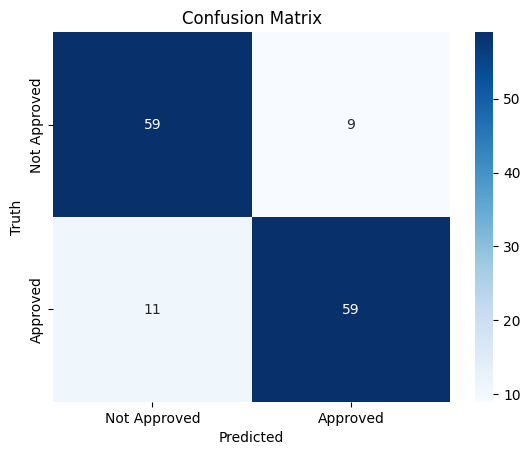

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)
y_pred_dt = model_dt.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_dt))
print(classification_report(Y_test,y_pred_dt))
print(confusion_matrix(Y_test,y_pred_dt))

0.7608695652173914
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        68
           1       0.79      0.71      0.75        70

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.76      0.76      0.76       138

[[55 13]
 [20 50]]


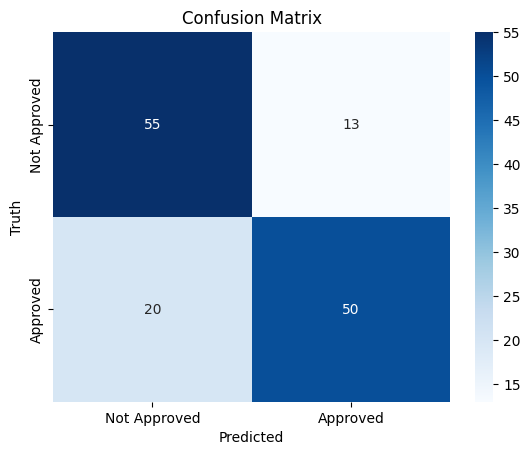

In [ ]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(Y_test,y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=20)
model_knn.fit(X_train,Y_train)
y_pred_knn=model_knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_knn))
print(classification_report(Y_test,y_pred_knn))
print(confusion_matrix(Y_test,y_pred_knn))

0.6086956521739131
              precision    recall  f1-score   support

           0       0.57      0.82      0.67        68
           1       0.70      0.40      0.51        70

    accuracy                           0.61       138
   macro avg       0.64      0.61      0.59       138
weighted avg       0.64      0.61      0.59       138

[[56 12]
 [42 28]]


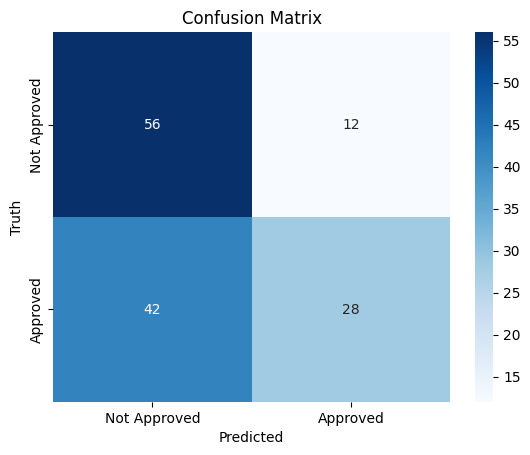

In [ ]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(Y_test,y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

X_bal, Y_bal = SMOTE().fit_resample(X, Y)
X_pca = PCA(n_components=2).fit_transform(X_bal)



In [ ]:
X_train_knn,X_test_knn,Y_train_knn,Y_test_knn=train_test_split(X_pca,Y_bal,test_size=0.2,random_state=42)

In [ ]:
model_knn.fit(X_train_knn,Y_train_knn)
y_pred_knn_s=model_knn.predict(X_test_knn)
print(accuracy_score(Y_test_knn,y_pred_knn_s))
print(classification_report(Y_test_knn,y_pred_knn_s))


0.564935064935065
              precision    recall  f1-score   support

           0       0.58      0.53      0.55        78
           1       0.55      0.61      0.58        76

    accuracy                           0.56       154
   macro avg       0.57      0.57      0.56       154
weighted avg       0.57      0.56      0.56       154



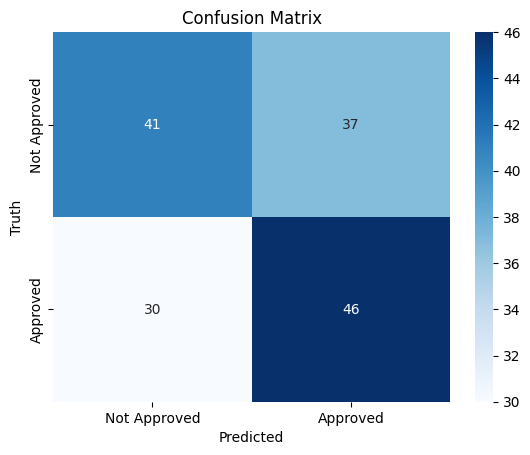

In [ ]:
from sklearn.metrics import confusion_matrix
cm_knn_s = confusion_matrix(Y_test_knn,y_pred_knn_s)
sns.heatmap(cm_knn_s, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn import svm
model_svm=svm.SVC(class_weight='balanced',kernel='rbf',gamma = "scale")
model_svm.fit(X_bal,Y_bal)
y_pred_svm=model_svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_svm))
print(classification_report(Y_test,y_pred_svm))
print(confusion_matrix(Y_test,y_pred_svm))

0.6086956521739131
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        68
           1       0.63      0.56      0.59        70

    accuracy                           0.61       138
   macro avg       0.61      0.61      0.61       138
weighted avg       0.61      0.61      0.61       138

[[45 23]
 [31 39]]


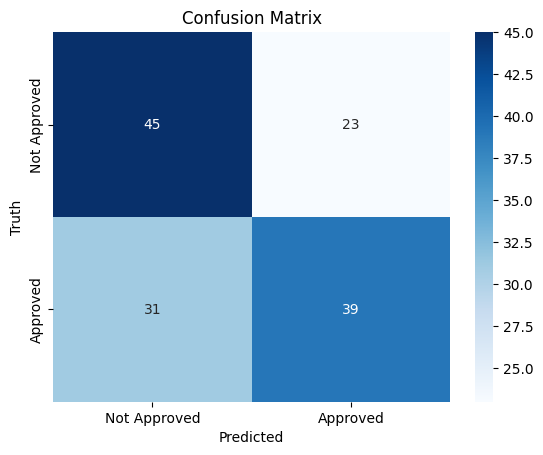

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(Y_test,y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,Y_train)
y_pred_rf=model_rf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_rf))
print(classification_report(Y_test,y_pred_rf))
print(confusion_matrix(Y_test,y_pred_rf))

0.8478260869565217
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        68
           1       0.88      0.81      0.84        70

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138

[[60  8]
 [13 57]]


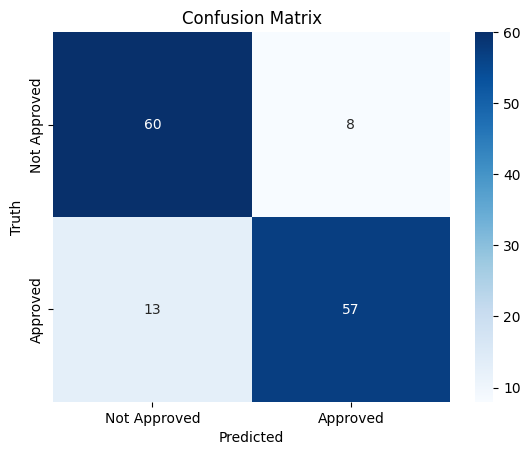

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(Y_test,y_pred_rf)
cm_rf
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
BGG = BaggingClassifier()
BGG.fit(X_train, Y_train)
y_pred_bgg = BGG.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_bgg))
print(classification_report(Y_test,y_pred_bgg))
print(confusion_matrix(Y_test,y_pred_bgg
                       ))

0.8768115942028986
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        68
           1       0.93      0.81      0.87        70

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138

[[64  4]
 [13 57]]


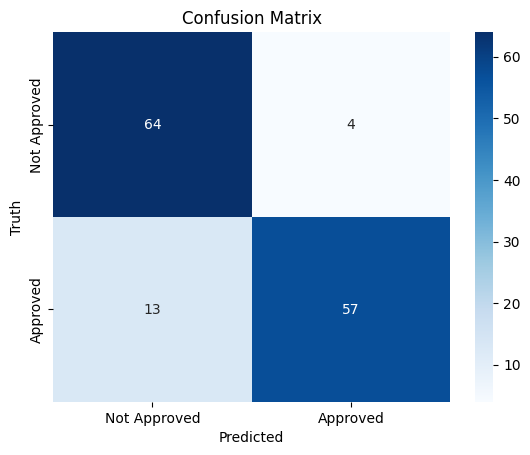

In [ ]:
from sklearn.metrics import confusion_matrix
cm_bgg= confusion_matrix(Y_test,y_pred_bgg)
sns.heatmap(cm_bgg, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, Y_train)
y_pred_ada = model_ada.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_ada))
print(classification_report(Y_test,y_pred_ada))
print(confusion_matrix(Y_test,y_pred_ada))

0.8405797101449275
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        68
           1       0.85      0.83      0.84        70

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

[[58 10]
 [12 58]]


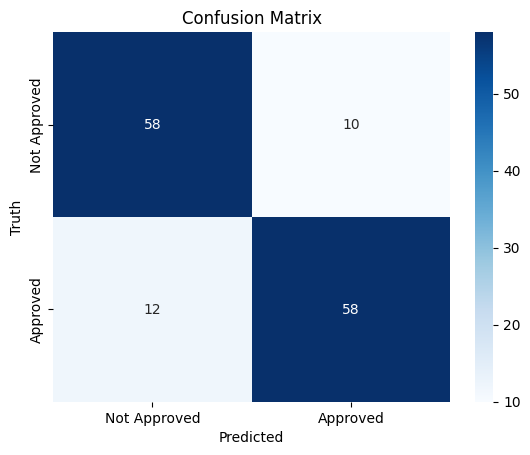

In [ ]:
from sklearn.metrics import confusion_matrix
cm_ada = confusion_matrix(Y_test,y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
base_estimator = RandomForestClassifier(max_depth=12, random_state=42)
br = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=0.05)

br = br.fit(X_train,Y_train)
y_pred_br = br.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_br))
print(classification_report(Y_test,y_pred_br))
print(confusion_matrix(Y_test,y_pred_br))

0.8768115942028986
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        68
           1       0.90      0.86      0.88        70

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138

[[61  7]
 [10 60]]


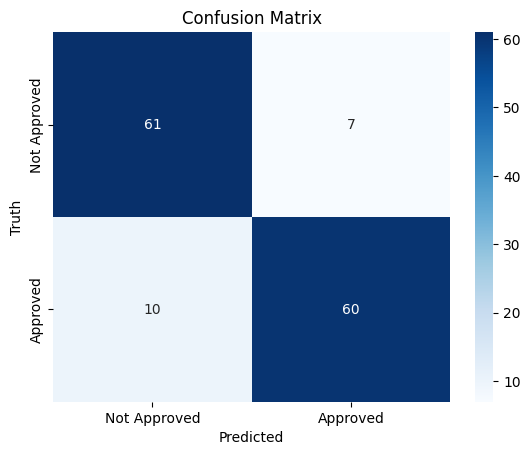

In [ ]:
from sklearn.metrics import confusion_matrix
cm_br = confusion_matrix(Y_test,y_pred_br)
sns.heatmap(cm_br, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb=GradientBoostingClassifier()
model_gb.fit(X_train,Y_train)
y_pred_gb=model_gb.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_gb))
print(classification_report(Y_test,y_pred_gb))
print(confusion_matrix(Y_test,y_pred_gb))

0.8260869565217391
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        68
           1       0.87      0.77      0.82        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138

[[60  8]
 [16 54]]


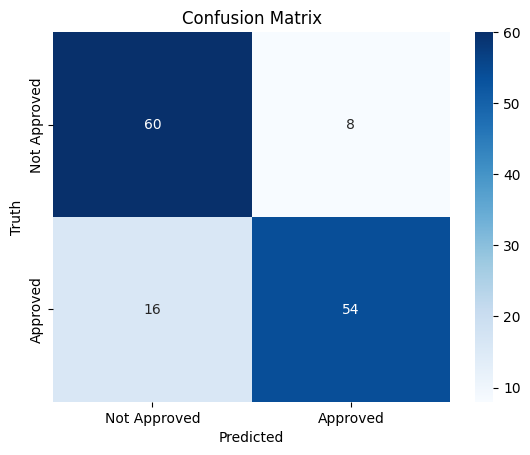

In [ ]:
from sklearn.metrics import confusion_matrix
cm_gb = confusion_matrix(Y_test,y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
# Create Boosting Classifier object
br_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, loss='exponential', criterion='squared_error')
br_gb = br_gb.fit(X_train,Y_train)
y_pred_gb_p = br_gb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_gb_p))
print(classification_report(Y_test,y_pred_gb_p))
print(confusion_matrix(Y_test,y_pred_gb_p))

0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        68
           1       0.87      0.79      0.83        70

    accuracy                           0.83       138
   macro avg       0.84      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138

[[60  8]
 [15 55]]


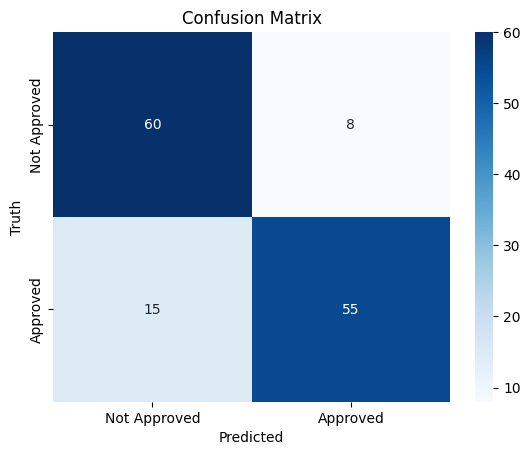

In [ ]:
from sklearn.metrics import confusion_matrix
cm_gb_P = confusion_matrix(Y_test,y_pred_gb_p)
sns.heatmap(cm_gb_P, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.3 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(X_train,Y_train)
y_pred_xgb=model_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_xgb))
print(classification_report(Y_test,y_pred_xgb))
print(confusion_matrix(Y_test,y_pred_xgb))

0.8405797101449275
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        68
           1       0.84      0.84      0.84        70

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

[[57 11]
 [11 59]]


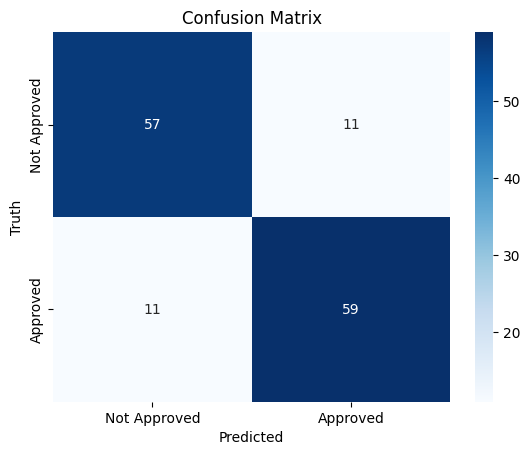

In [ ]:
from sklearn.metrics import confusion_matrix
cm_xgb = confusion_matrix(Y_test,y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
# Create Boosting Classifier object
br_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)
br_xgb = br_xgb.fit(X_train,Y_train)
y_pred_xgb_p = br_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_pred_xgb_p))
print(classification_report(Y_test,y_pred_xgb_p))
print(confusion_matrix(Y_test,y_pred_xgb_p))

0.8478260869565217
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        68
           1       0.88      0.81      0.84        70

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138

[[60  8]
 [13 57]]


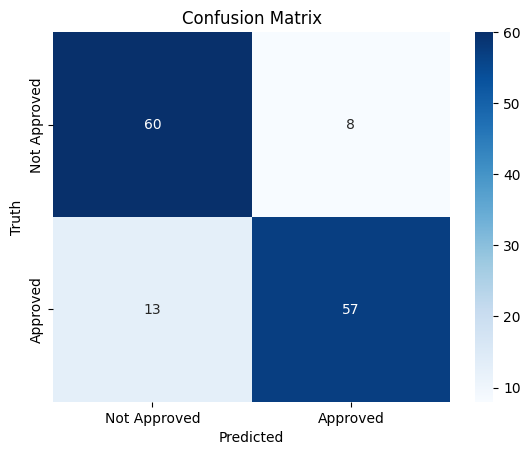

In [ ]:
from sklearn.metrics import confusion_matrix
cm_xgb_p = confusion_matrix(Y_test,y_pred_xgb_p)
sns.heatmap(cm_xgb_p, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 37.7 kB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'criterion': ['gini', 'entropy']
    }),
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'max_features': ['sqrt', 'log2']
    }),
    "SVM": (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    "AdaBoost": (AdaBoostClassifier(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    "Gradient Boost": (GradientBoostingClassifier(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    "Bagging": (BaggingClassifier(), {
        'n_estimators': [10, 50],
        'max_samples': [0.5, 1.0]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    })
}

results = {}
for name, (model, params) in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, Y_train)
    results[name] = {
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    }

# Print summary
for name, res in results.items():
    print(f"\n{name}:")
    print(f"Best Accuracy: {res['best_score']:.4f}")
    print(f"Best Params: {res['best_params']}")


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training KNN...
Training AdaBoost...
Training Gradient Boost...
Training Bagging...
Training XGBoost...

Logistic Regression:
Best Accuracy: 0.8569
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Decision Tree:
Best Accuracy: 0.8187
Best Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

Random Forest:
Best Accuracy: 0.8768
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

SVM:
Best Accuracy: 0.8623
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

KNN:
Best Accuracy: 0.7101
Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

AdaBoost:
Best Accuracy: 0.8713
Best Params: {'learning_rate': 1, 'n_estimators': 100}

Gradient Boost:
Best Accuracy: 0.8587
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Bagging:
Best Accuracy: 0.8605
Best Params: {'max_samples': 0.5, 'n

In [ ]:


# Define classifiers with best params
models = {
    "Logistic Regression": LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt'),
    "SVM": SVC(C=0.1, kernel='linear', gamma='scale'),
    "KNN": KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform'),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=1),
    "Gradient Boost": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Bagging": BaggingClassifier(n_estimators=50, max_samples=0.5),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each
for name, model in models.items():
    model.fit(X_train, Y_train)
    acc = model.score(X_test, Y_test)
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.8406
Decision Tree: Accuracy = 0.7826
Random Forest: Accuracy = 0.8478
SVM: Accuracy = 0.8261
KNN: Accuracy = 0.6812
AdaBoost: Accuracy = 0.8188
Gradient Boost: Accuracy = 0.8261
Bagging: Accuracy = 0.8913
XGBoost: Accuracy = 0.8261


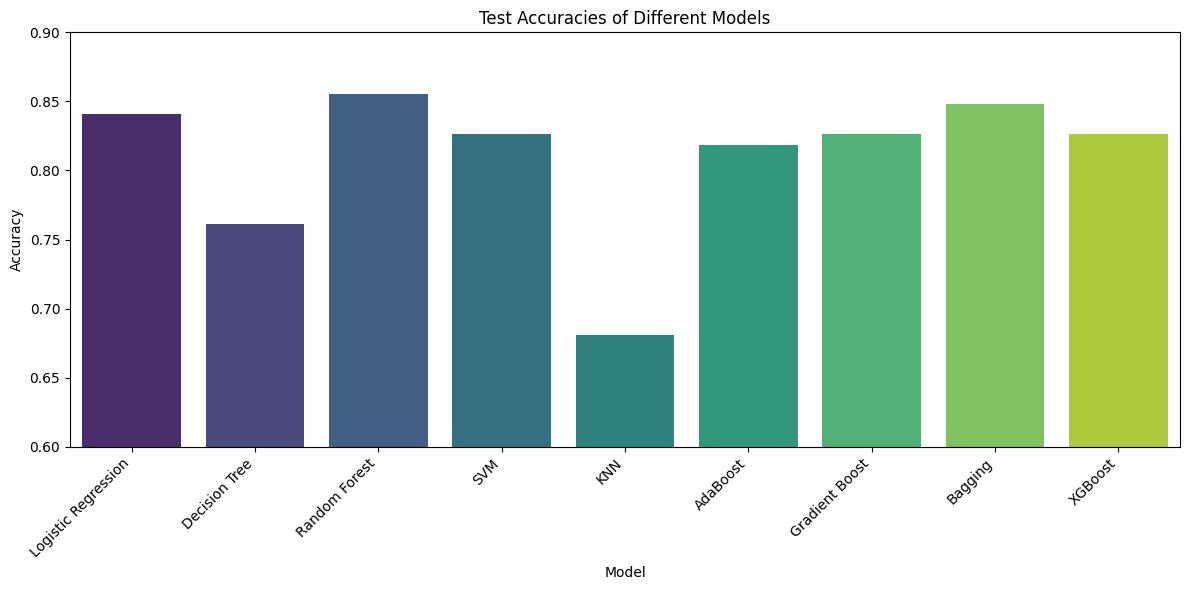

In [ ]:

# Accuracy results
model_names = [
    'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM',
    'KNN', 'AdaBoost', 'Gradient Boost', 'Bagging', 'XGBoost'
]

accuracies = [0.8406, 0.7609, 0.8551, 0.8261, 0.6812, 0.8188, 0.8261, 0.8478, 0.8261]

# Create DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Model', y='Accuracy', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.6, 0.9)
plt.title('Test Accuracies of Different Models')
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train, Y_train, epochs= 250)

Epoch 1/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5698 - loss: 17.9543 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5698 - loss: 10.0909 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 3/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5698 - loss: 5.1062 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 4/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5405 - loss: 1.7428 - precision: 0.2874 - recall: 0.1143         
Epoch 5/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4521 - loss: 0.8527 - precision: 0.3986 - recall: 0.5725 
Epoch 6/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5092 - loss: 0.8618 - precision: 0.4217 - recall: 0.3309 
Epoch 7/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4716 - loss: 0.7995 - precision: 0.3767 - recall: 0.3467 
Epoch 8/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4513 - loss: 0.7966 - precision: 0.3513 -

In [ ]:
import tensorflow as tf
import itertools
import pandas as pd

# Parameter ranges
learning_rates = [0.001, 0.0005, 0.005]
epochs_list = [100, 200]
hidden_layer_configs = [
    [10, 7, 5],
    [16, 8, 4],
    [32, 16, 8]
]

results = []

# Grid search over parameters
for lr, epochs, layers in itertools.product(learning_rates, epochs_list, hidden_layer_configs):
    tf.random.set_seed(42)

    # Build model dynamically
    model = tf.keras.Sequential()
    for units in layers:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile
    model.compile(
        loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

    # Train
    history = model.fit(X_train, Y_train, epochs=epochs, verbose=0)

    # Evaluate
    loss, acc, prec, rec = model.evaluate(X_test, Y_test, verbose=0)

    results.append({
        'Learning Rate': lr,
        'Epochs': epochs,
        'Layers': layers,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    })

# Save results as DataFrame
df_results = pd.DataFrame(results)
print(df_results)


    Learning Rate  Epochs       Layers  Accuracy  Precision    Recall
0          0.0010     100   [10, 7, 5]  0.847826   0.929825  0.757143
1          0.0010     100   [16, 8, 4]  0.818841   0.941176  0.685714
2          0.0010     100  [32, 16, 8]  0.833333   0.927273  0.728571
3          0.0010     200   [10, 7, 5]  0.789855   0.936170  0.628571
4          0.0010     200   [16, 8, 4]  0.797101   0.937500  0.642857
5          0.0010     200  [32, 16, 8]  0.811594   0.958333  0.657143
6          0.0005     100   [10, 7, 5]  0.753623   0.928571  0.557143
7          0.0005     100   [16, 8, 4]  0.746377   0.948718  0.528571
8          0.0005     100  [32, 16, 8]  0.753623   0.973684  0.528571
9          0.0005     200   [10, 7, 5]  0.637681   1.000000  0.285714
10         0.0005     200   [16, 8, 4]  0.782609   0.916667  0.628571
11         0.0005     200  [32, 16, 8]  0.775362   0.914894  0.614286
12         0.0050     100   [10, 7, 5]  0.818841   0.857143  0.771429
13         0.0050   

<Axes: >

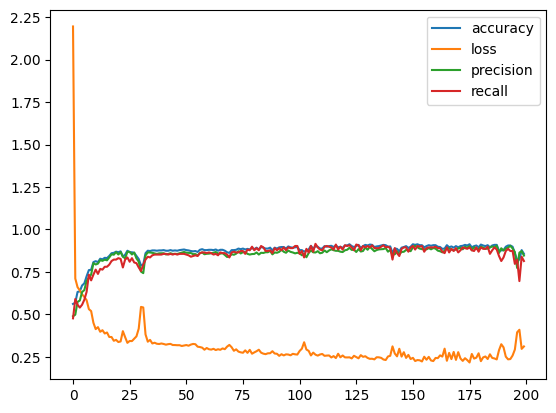

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.summary();

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,461 (13.52 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,308 (9.02 KB)

In [ ]:
model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7417 - loss: 0.5344 - precision: 0.9842 - recall: 0.4657 


[0.5875997543334961, 0.717391312122345, 0.9696969985961914, 0.4571428596973419]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Define classifiers with best params (using the best params found in the previous grid search)
models = {
    "Logistic Regression": LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt'),
    "SVM": SVC(C=0.1, kernel='linear', gamma='scale'),
    "KNN": KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform'),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=1),
    "Gradient Boost": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Bagging": BaggingClassifier(n_estimators=50, max_samples=0.5),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, use_label_encoder=False, eval_metric='logloss')
}

# Define train-test split percentages
split_percentages = [0.30, 0.25, 0.40, 0.15]

# Dictionary to store results for each split and model
all_results = {}

# Iterate through split percentages
for test_size in split_percentages:
    print(f"\n--- Evaluating models with test size: {test_size*100:.0f}/{100 - test_size*100:.0f} split ---")

    # Split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Store results for this split
    split_results = {}

    # Iterate through models
    for name, model in models.items():
        print(f"Training {name}...")
        # Train and evaluate model
        model.fit(X_train, Y_train)
        acc = model.score(X_test, Y_test)
        split_results[name] = acc

    all_results[f'{test_size*100:.0f}/{100 - test_size*100:.0f}'] = split_results

# Print summary of results
for split, results in all_results.items():
    print(f"\nResults for {split} split:")
    for name, accuracy in results.items():
        print(f"{name}: Accuracy = {accuracy:.4f}")


--- Evaluating models with test size: 30/70 split ---
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training KNN...
Training AdaBoost...
Training Gradient Boost...
Training Bagging...
Training XGBoost...

--- Evaluating models with test size: 25/75 split ---
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training KNN...
Training AdaBoost...
Training Gradient Boost...
Training Bagging...
Training XGBoost...

--- Evaluating models with test size: 40/60 split ---
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training KNN...
Training AdaBoost...
Training Gradient Boost...
Training Bagging...
Training XGBoost...

--- Evaluating models with test size: 15/85 split ---
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training KNN...
Training AdaBoost...
Training Gradient Boost...
Trai

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define train-test split percentages
split_percentages = [0.30, 0.25, 0.40, 0.15]

# Iterate through split percentages and evaluate the neural network
for test_size in split_percentages:
    print(f"\n--- Evaluating Neural Network with test size: {test_size*100:.0f}/{100 - test_size*100:.0f} split ---")

    # Split data
    X_train_nn, X_test_nn, Y_train_nn, Y_test_nn = train_test_split(X, Y, test_size=test_size, random_state=42)

    tf.random.set_seed(42)

    # STEP1: Creating the model
    model_nn = tf.keras.Sequential([
                                tf.keras.layers.Dense(10, activation='relu'),
                                tf.keras.layers.Dense(7, activation='relu'),
                                tf.keras.layers.Dense(5, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # STEP2: Compiling the model
    model_nn.compile(loss= tf.keras.losses.binary_crossentropy,
                  optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                            tf.keras.metrics.Precision(name='precision'),
                            tf.keras.metrics.Recall(name='recall')
                  ]
                  )

    # STEP3: Fit the model
    history_nn = model_nn.fit(X_train_nn, Y_train_nn, epochs= 250, verbose=0)

    # STEP4: Evaluate the model
    loss_nn, acc_nn, prec_nn, rec_nn = model_nn.evaluate(X_test_nn, Y_test_nn, verbose=0)

    print(f"Accuracy: {acc_nn:.4f}")
    print(f"Precision: {prec_nn:.4f}")
    print(f"Recall: {rec_nn:.4f}")


--- Evaluating Neural Network with test size: 30/70 split ---
Accuracy: 0.8019
Precision: 0.8111
Recall: 0.7526

--- Evaluating Neural Network with test size: 25/75 split ---
Accuracy: 0.8555
Precision: 0.8701
Recall: 0.8171

--- Evaluating Neural Network with test size: 40/60 split ---
Accuracy: 0.8623
Precision: 0.8537
Recall: 0.8400

--- Evaluating Neural Network with test size: 15/85 split ---
Accuracy: 0.8365
Precision: 0.9070
Recall: 0.7500
